In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt   #import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

In [1]:
# #df = pd.read_csv(r"/home/uia72388/Share_A/Analyse.csv")d
# df = pd.read_csv(r'/home/uia72388/Share_A/New Data/AnalyseThis.csv')
# df.head()

In [4]:
#df_null =df[pd.isnull(df['vdy.velocity'])]
#df_null

In [5]:
#df_null.info()

In [6]:
#df_copy = df[pd.notnull(df['vdy.velocity'])]


In [7]:
#df_copy

In [8]:
import statistics as st
import scipy as  sp

In [2]:
# df['vdy.velocity'].describe()

In [10]:
30.412811-11.250000

19.162811

In [3]:
# vels = df['vdy.velocity'].dropna()
# vels.head()

In [12]:
med = st.median(df['vdy.velocity'].dropna().values)
med

18.87586784362793

In [13]:
iqr = sp.stats.iqr(df['vdy.velocity'].dropna().values)
l1,l2,l3,l4 ,l5= iqr , iqr*0.25 , med- (iqr*0.25) , med+ (iqr*0.25) , med
l1, l2, l3, l4 , l5

(19.162811279296875,
 4.790702819824219,
 14.085165023803711,
 23.66657066345215,
 18.87586784362793)

In [14]:
q1 = vels[(vels <= l3)]
q2 = vels[(vels > l3) & (vels <= l4)]
q3 = vels[(vels > l4)]

In [15]:
len(q1),len(q2),len(q3), len(q1) +len(q2)+len(q3)

(64266, 53403, 75304, 192973)

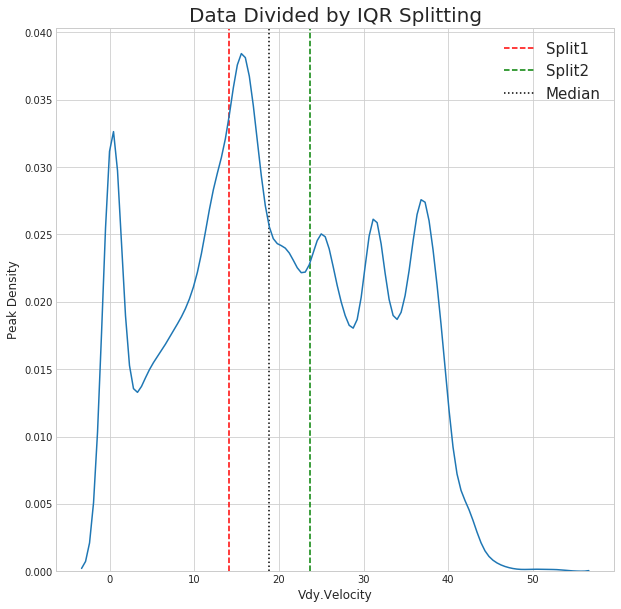

In [16]:
plt.figure(figsize=(10,10))
plt.axvline(max(q1),linestyle='--',color='r')
plt.axvline(max(q2),linestyle='--',color='g')
plt.axvline(med, linestyle=':',color='k')
sns.distplot(df['vdy.velocity'], kde=True, hist=False)
plt.title("Data Divided by IQR Splitting" , fontsize=20)
plt.xlabel('Vdy.Velocity', fontsize=12)
plt.ylabel('Peak Density', fontsize=12)
plt.legend(['Split1', 'Split2', 'Median'], fontsize= 15)
plt.savefig('IQR Splitting.jpg')

In [17]:
len(q1)/214,len(q2)/214,len(q3)/214

(300.30841121495325, 249.5467289719626, 351.8878504672897)

In [20]:
y=[]
import random
c = 0
for i in q1:
    c+=1
    if c ==300:
        c=0
    else:
        continue
    y.append(i)

In [21]:
c = 0
for i in q2:
    c+=1
    if c ==248:
        c=0
    else:
        continue
    y.append(i)
c = 0
for i in q3:
    c+=1
    if c ==351:
        c=0
    else:
        continue
    y.append(i)
len(y)    


643

In [22]:
x = range(643)

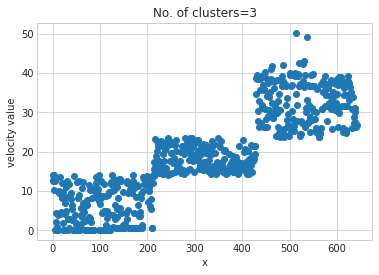

In [23]:
plt.scatter(x= x, y=y)
plt.title('No. of clusters=3')
plt.ylabel('velocity value')
plt.xlabel('x')
plt.savefig('Mediansplit clust.jpg')

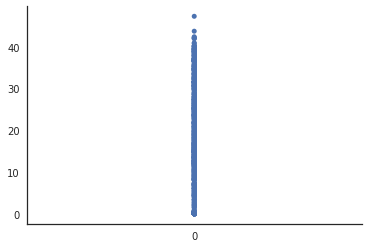

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

sns.set(style="white", color_codes=True)
sns.stripplot(data=newvels)
sns.despine()

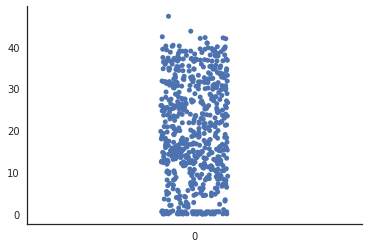

In [18]:
sns.stripplot(data=newvels, jitter=True)
sns.despine()

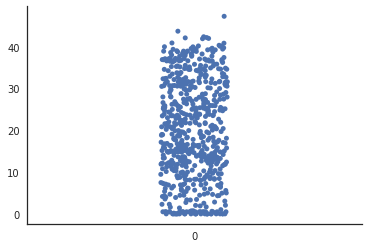

In [19]:
sns.stripplot(data=newvels, jitter=True, 
              edgecolor='none') # remove the points' default edges 
sns.despine()

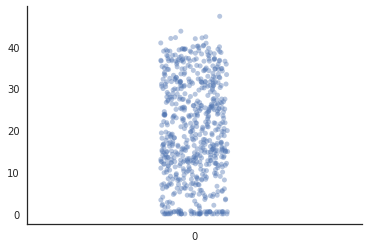

In [20]:
sns.stripplot(data=newvels, jitter=True, edgecolor='none', alpha=.40)
sns.despine()

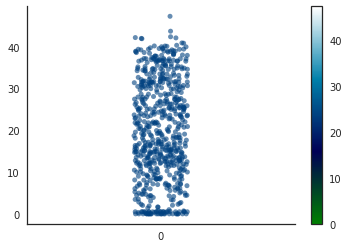

In [21]:
import matplotlib.colors as mcolors
import matplotlib.cm as cm

plot = sns.stripplot(data=newvels, 
              palette='ocean', 
              jitter=True, edgecolor='none', alpha=.60)
#plot.get_legend().set_visible(False)
sns.despine()
pd.Series(newvels).describe()

# Drawing the side color bar
normalize = mcolors.Normalize(vmin=np.asarray(newvels).min(), vmax=np.asarray(newvels).max())
colormap = cm.ocean

for n in newvels:
    plt.plot(color=colormap(normalize(n)))

scalarmappaple = cm.ScalarMappable(norm=normalize, cmap=colormap)
scalarmappaple.set_array(newvels)
plt.colorbar(scalarmappaple)

In [22]:
sns.kdeplot(data = data)

NameError: name 'data' is not defined

count    64266.000000
mean         6.582732
std          4.876602
min          0.000000
25%          0.768542
50%          7.016097
75%         11.237816
max         14.085079
Name: vdy.velocity, dtype: float64

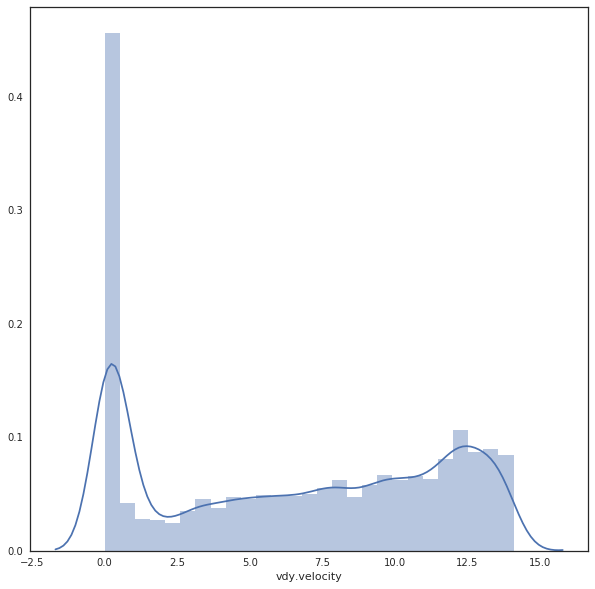

In [23]:
plt.figure(figsize=(10,10))
sns.distplot(q1)

pd.Series(q1).describe()


count    53403.000000
mean        18.231400
std          2.731953
min         14.085665
25%         15.821181
50%         17.696180
75%         20.539062
max         23.665779
Name: vdy.velocity, dtype: float64

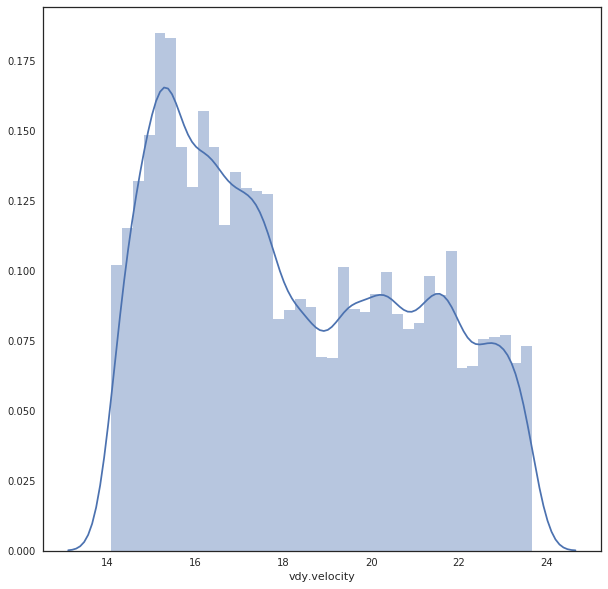

In [24]:
plt.figure(figsize=(10,10))
sns.distplot(q2)

pd.Series(q2.describe())


count    75304.000000
mean        32.414703
std          5.245883
min         23.667116
25%         27.835070
50%         31.928229
75%         36.731773
max         53.281746
Name: vdy.velocity, dtype: float64

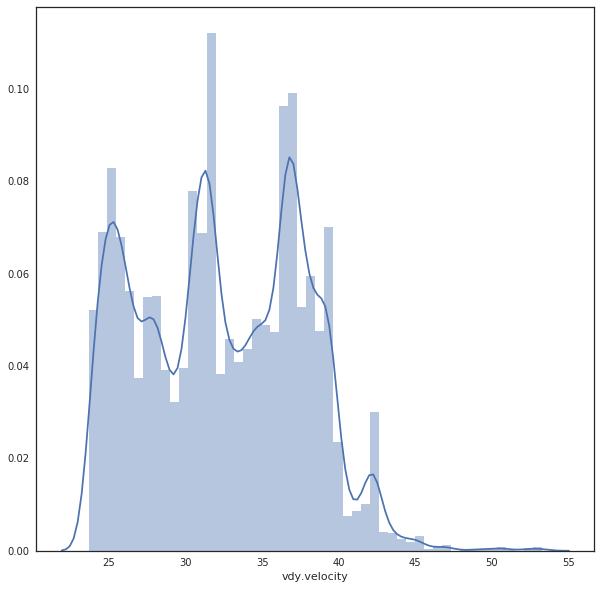

In [25]:
plt.figure(figsize=(10,10))
sns.distplot(q3)

pd.Series(q3).describe()


In [27]:
'''from Bio.Cluster import *

#   Load data, in Cluster format
data = pd.Series(np.transpose(df['vdy.velocity'].dropna().values))

#   Clustering using Pearson's correlation and average linkage
gene_clustering=data.treecluster(method="a",dist="c",transpose=0)

#   Same as above, but clustering samples
exp_clustering = data.treecluster(method="a",dist="c", transpose=1)

#   We then save the results to a series of files to view in Java TreeView
data.save("name",gene_clustering,exp_clustering)'''

'from Bio.Cluster import *\n\n#   Load data, in Cluster format\ndata = pd.Series(np.transpose(df[\'vdy.velocity\'].dropna().values))\n\n#   Clustering using Pearson\'s correlation and average linkage\ngene_clustering=data.treecluster(method="a",dist="c",transpose=0)\n\n#   Same as above, but clustering samples\nexp_clustering = data.treecluster(method="a",dist="c", transpose=1)\n\n#   We then save the results to a series of files to view in Java TreeView\ndata.save("name",gene_clustering,exp_clustering)'